# Simple NN for survival prediction on the Titanic

author: Witalis Domitrz <witekdomitrz@gmail.com>

## Downloading the data

In [1]:
!wget http://students.mimuw.edu.pl/~wd393711/iml/titanic.zip
!unzip -o titanic.zip
!rm titanic.zip

--2020-03-09 07:40:42--  http://students.mimuw.edu.pl/~wd393711/iml/titanic.zip
Resolving students.mimuw.edu.pl (students.mimuw.edu.pl)... 193.0.96.129, 2001:6a0:5001:1::3
Connecting to students.mimuw.edu.pl (students.mimuw.edu.pl)|193.0.96.129|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34877 (34K) [application/zip]
Saving to: ‘titanic.zip’

titanic.zip         100%[===================>]  34.06K  --.-KB/s    in 0.1s    

2020-03-09 07:40:42 (304 KB/s) - ‘titanic.zip’ saved [34877/34877]

Archive:  titanic.zip
  inflating: gender_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


## Imports

In [2]:
%tensorflow_version 2.x
import numpy as np 
import pandas as pd
import tensorflow.keras.layers as layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adadelta
from tensorflow.keras.callbacks import Callback

TensorFlow 2.x selected.


## Prepare the data

In [0]:
X_columns = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
Y_columns = ['Survived']

def load_data(fn):
    return pd.read_csv(fn).set_index('PassengerId')

def to_array(data):
    return pd.get_dummies(data).astype(dtype='float32').values

def split_to_x_y(data):
    return to_array(data[X_columns]), to_array(data[Y_columns])

def get_data():
    train = load_data('./train.csv')
    test = load_data('./gender_submission.csv').join(load_data('./test.csv'))    

    train['is_train'] = True
    test['is_train'] = False
    data = pd.concat([train, test])

    # Replace missing values with mean
    data.fillna(data.mean(), inplace=True)

    # Split test and train
    train = data[data['is_train']]
    test = data[data['is_train'] == False]

    return split_to_x_y(train), split_to_x_y(test)

In [0]:
(train_x, train_y), (test_x, test_y) = get_data()

## Create and train a model

In [0]:
def create_net():
    model = Sequential()
    for i in range(4):
        model.add(layers.Dense(32, activation='relu'))
        model.add(layers.BatchNormalization())
        model.add(layers.Dense(24, activation='relu'))
        model.add(layers.Dropout(0.5))
        model.add(layers.BatchNormalization())
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer = Adadelta(lr=1.), metrics = ['accuracy'])
    return model

In [0]:
model = create_net()
batch_size = 256
training_history = model.fit(train_x, train_y, epochs=512, verbose=0, batch_size=batch_size, validation_split=0.2)

## Plot training statistics

In [0]:
import matplotlib.pyplot as plt

def plot_history_info(history):
    # get from variable "history"
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = history.epoch

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.figure()

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

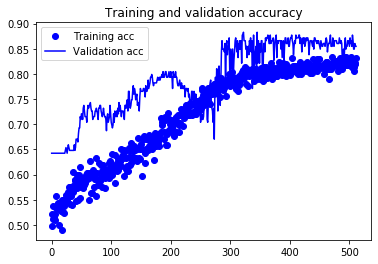

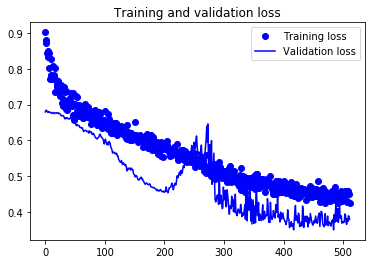

In [8]:
plot_history_info(training_history)

## Check the final accuracy

In [9]:
(test_loss, test_accuracy) = model.evaluate(test_x, test_y, batch_size=1)
print("Test accuracy: {}".format(test_accuracy))

418/418 [==============================] - 1s 2ms/sample - loss: 0.3123 - accuracy: 0.9019
Test accuracy: 0.9019138813018799
